## Importing data and necessary libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
health_data = pd.read_csv('health care diabetes.csv')

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Analysis

In [5]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Missing value and treatment

In [6]:
health_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
### No missing values 

In [8]:
health_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
for col in health_data.columns:
    print (col)
    print(health_data[col].value_counts())
    print('\n')

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19

In [10]:
# checking for duplicates
health_data.duplicated().value_counts()

False    768
dtype: int64

#### outlier detection and removal

In [11]:
# CheckIng for outliers
def outlierDetection(columnData):
  #1. Sort  data in ascending order
  sorted(columnData)

  #2. Get Q1 and Q3
  Q1,Q3 = np.percentile(columnData,[25,75])

  #3. Calc IQR
  IQR = Q3-Q1

  #4. Based on IQR I will calculate lower acceptable Range and upper acceptable range

  lowerrange = Q1 - (1.5* IQR)
  upperrange = Q3 + (1.5* IQR)

  return lowerrange,upperrange

In [12]:
columns_with_outliers = []
for column in health_data.columns:
    print (column)
    lr,ur = outlierDetection(health_data[column])
    if ((lr <= health_data[column].min()) & (ur >= health_data[column].max())):
        print ("no outliers\n")
    else:
        print("outliers are present\n")
        columns_with_outliers.append(column)

Pregnancies
outliers are present

Glucose
outliers are present

BloodPressure
outliers are present

SkinThickness
outliers are present

Insulin
outliers are present

BMI
outliers are present

DiabetesPedigreeFunction
outliers are present

Age
outliers are present

Outcome
no outliers



In [13]:
columns_with_outliers

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#### Outlier removal and distplot  for all variables

In [14]:
lr,ur = outlierDetection(health_data['Pregnancies'])
health_data = health_data[(health_data['Pregnancies'] >= lr) & (health_data['Pregnancies'] <= ur)]

<Axes: xlabel='Pregnancies', ylabel='Density'>

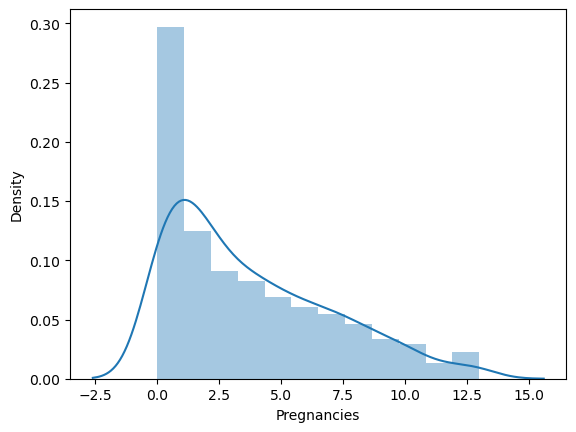

In [15]:
sns.distplot(health_data['Pregnancies'])

In [16]:
lr,ur = outlierDetection(health_data['Glucose'])
health_data = health_data[(health_data['Glucose'] >= lr) & (health_data['Glucose'] <= ur)]

<Axes: xlabel='Glucose', ylabel='Density'>

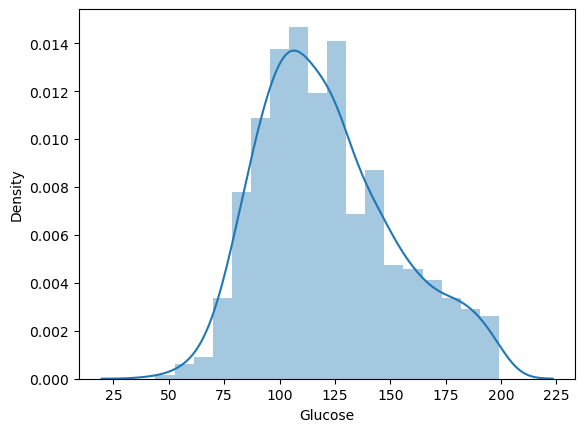

In [17]:
sns.distplot(health_data['Glucose'])

In [18]:
lr,ur = outlierDetection(health_data['BloodPressure'])
health_data = health_data[(health_data['BloodPressure'] >= lr) & (health_data['BloodPressure'] <= ur)]

<Axes: xlabel='BloodPressure', ylabel='Density'>

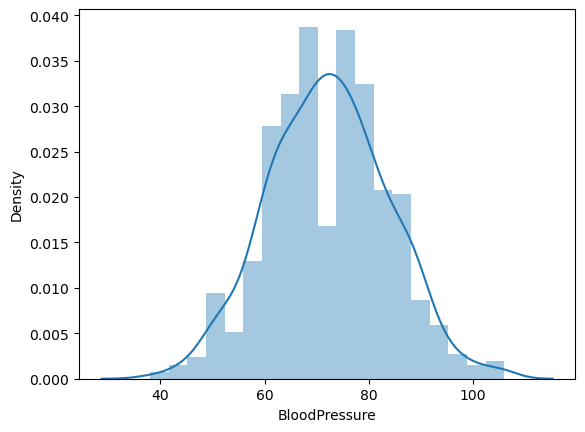

In [19]:
sns.distplot(health_data['BloodPressure'])

In [20]:
lr,ur = outlierDetection(health_data['SkinThickness'])
health_data = health_data[(health_data['SkinThickness'] >= lr) & (health_data['SkinThickness'] <= ur)]

<Axes: xlabel='SkinThickness', ylabel='Density'>

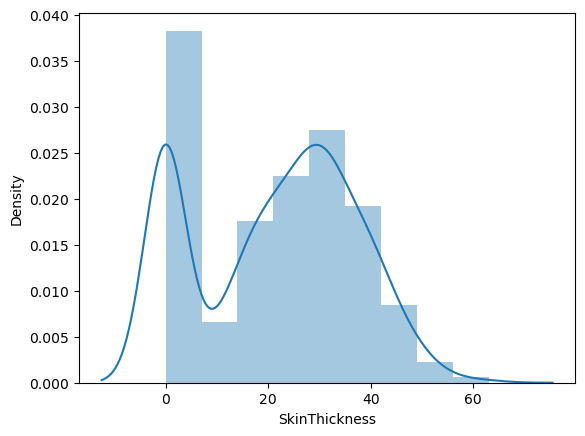

In [21]:
sns.distplot(health_data['SkinThickness'])

In [22]:
lr,ur = outlierDetection(health_data['Insulin'])
health_data = health_data[(health_data['Insulin'] >= lr) & (health_data['Insulin'] <= ur)]

<Axes: xlabel='Insulin', ylabel='Density'>

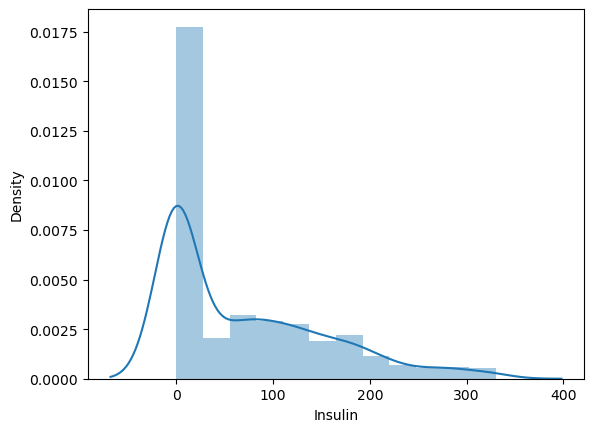

In [23]:
sns.distplot(health_data['Insulin'])

In [24]:
lr,ur = outlierDetection(health_data['BMI'])
health_data = health_data[(health_data['BMI'] >= lr) & (health_data['BMI'] <= ur)]

<Axes: xlabel='BMI', ylabel='Density'>

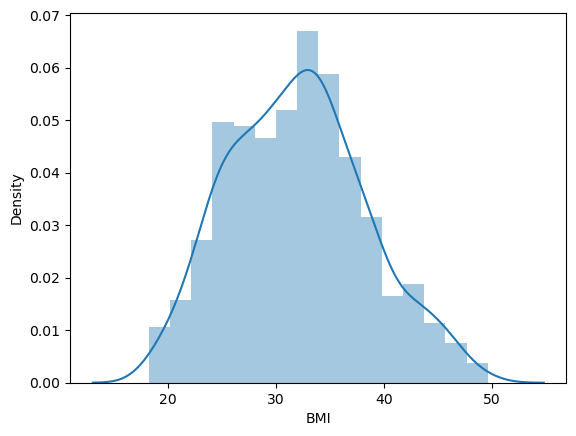

In [25]:
sns.distplot(health_data['BMI'])

In [26]:
lr,ur = outlierDetection(health_data['DiabetesPedigreeFunction'])
health_data = health_data[(health_data['DiabetesPedigreeFunction'] >= lr) & (health_data['DiabetesPedigreeFunction'] <= ur)]

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

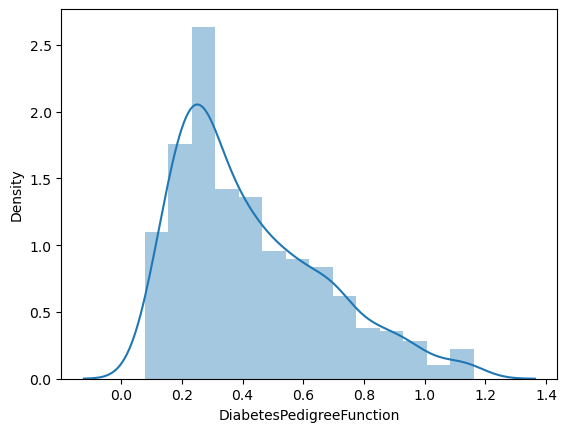

In [27]:
sns.distplot(health_data['DiabetesPedigreeFunction'])

In [28]:
lr,ur = outlierDetection(health_data['Age'])
health_data = health_data[(health_data['Age'] >= lr) & (health_data['Age'] <= ur)]

<Axes: xlabel='Age', ylabel='Density'>

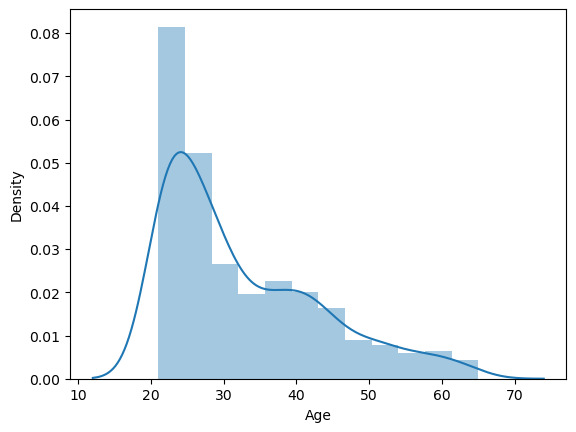

In [29]:
sns.distplot(health_data['Age'])

#### Countplot for target variable

<Axes: xlabel='Outcome', ylabel='count'>

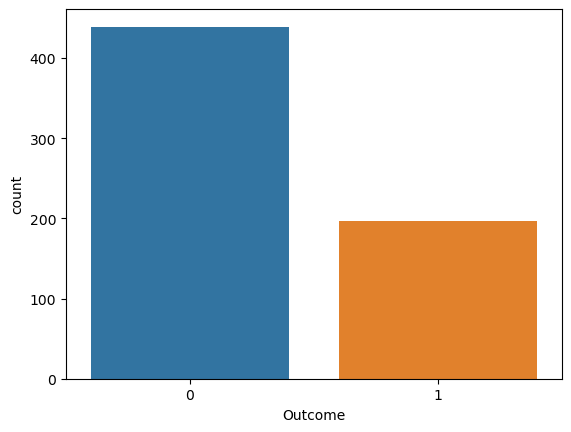

In [30]:
sns.countplot(data=health_data,x='Outcome')

In [31]:
### data is unbalanced

#### How is diabetes related to different variables ?

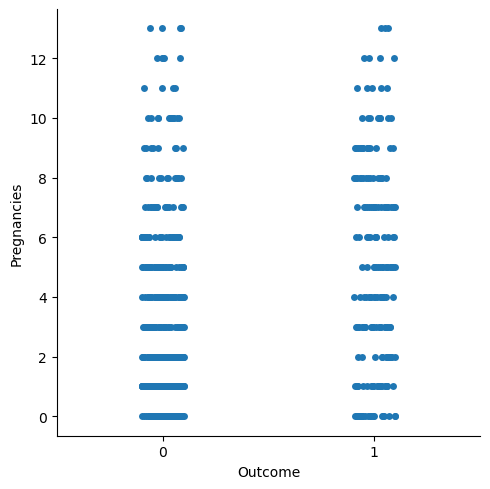

In [32]:
sns.catplot(data=health_data, y='Pregnancies',x='Outcome')

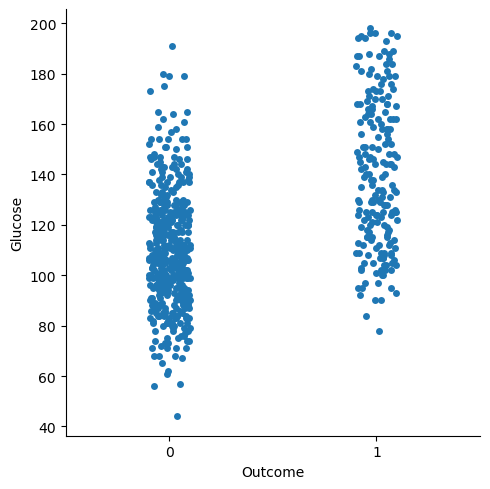

In [33]:
sns.catplot(data=health_data, y='Glucose',x='Outcome')

In [34]:
# Diabetes seems to prevail in people with high blood glucose

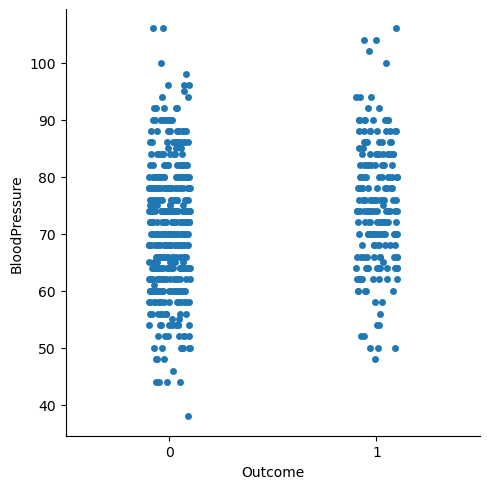

In [35]:
sns.catplot(data=health_data, y='BloodPressure',x='Outcome')

In [36]:
# people with low blood pressure not likely to have diabetes

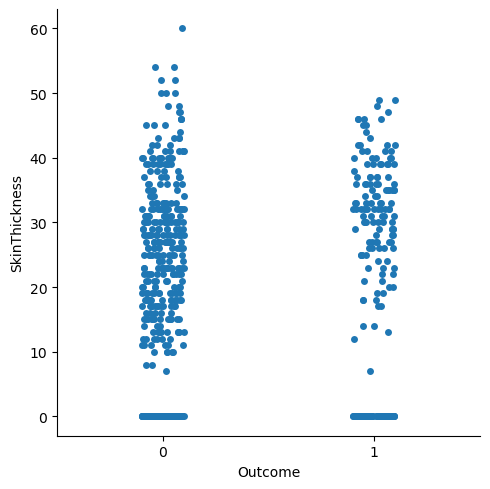

In [37]:
sns.catplot(data=health_data, y='SkinThickness',x='Outcome')

In [38]:
# Skin thickness doesn't have major impact on diabetes.

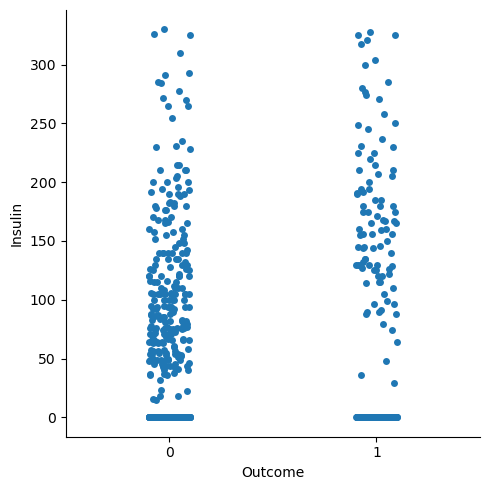

In [39]:
sns.catplot(data=health_data, y='Insulin',x='Outcome')

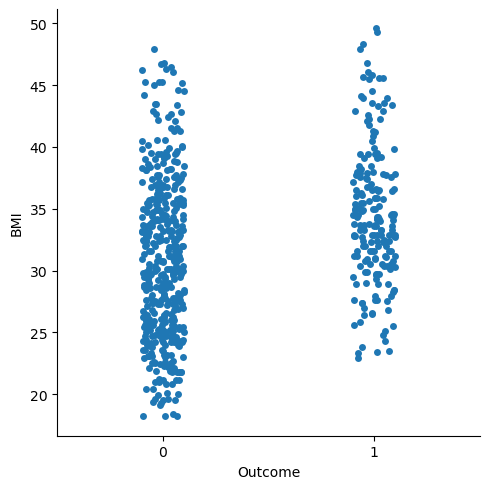

In [40]:
sns.catplot(data=health_data, y='BMI',x='Outcome')

In [41]:
# people with low BMI not likely to have diabetes

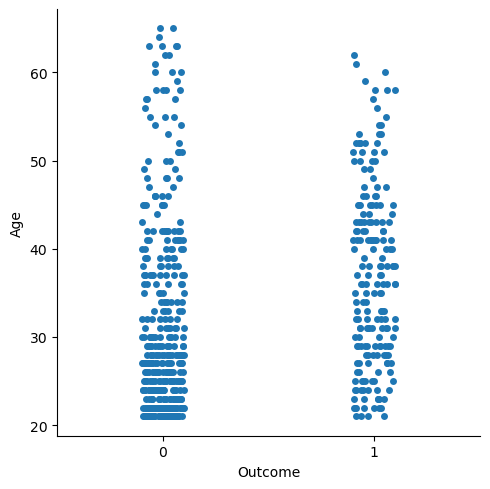

In [42]:
sns.catplot(data=health_data, y='Age',x='Outcome')

In [43]:
# even younger people can be diabetic

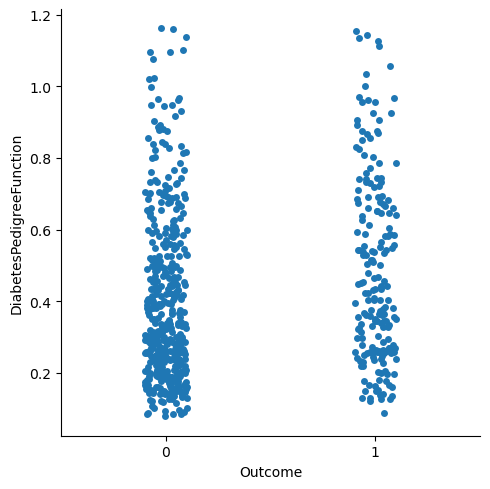

In [44]:
sns.catplot(data=health_data, y='DiabetesPedigreeFunction',x='Outcome')

#### Pairplot for all variables

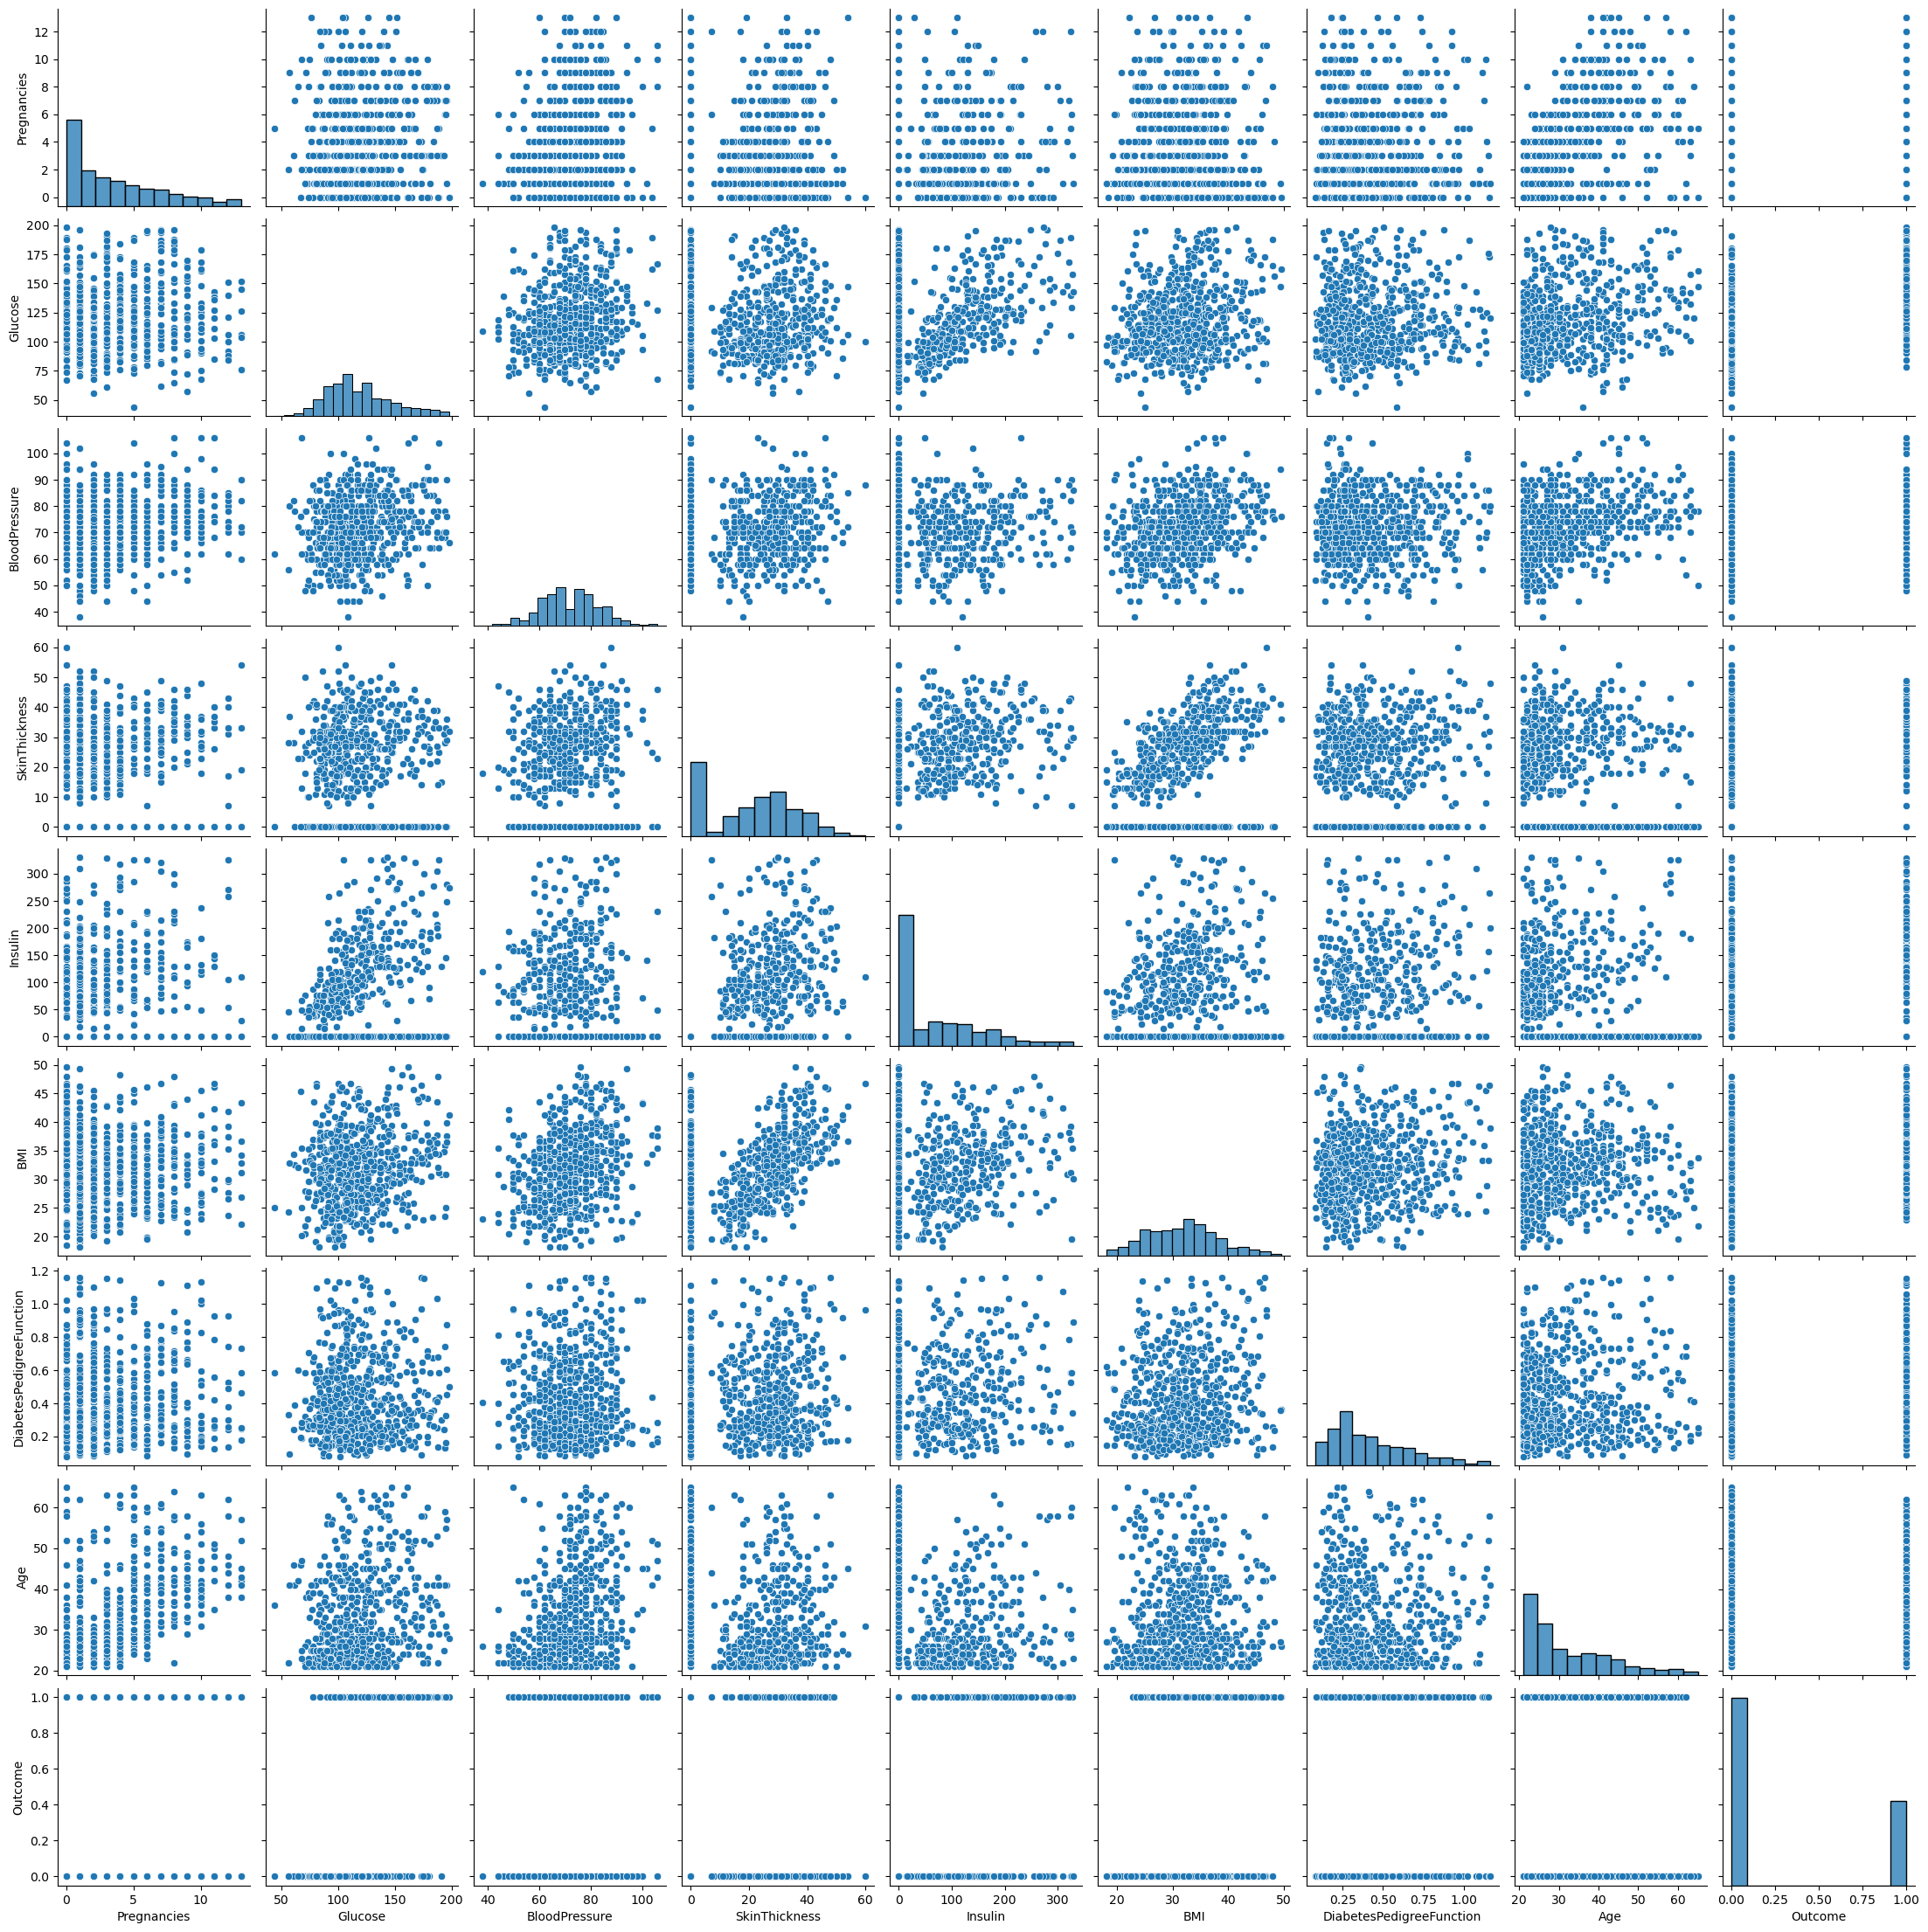

In [45]:
sns.pairplot(health_data)

### Correlation between different variables

<Axes: >

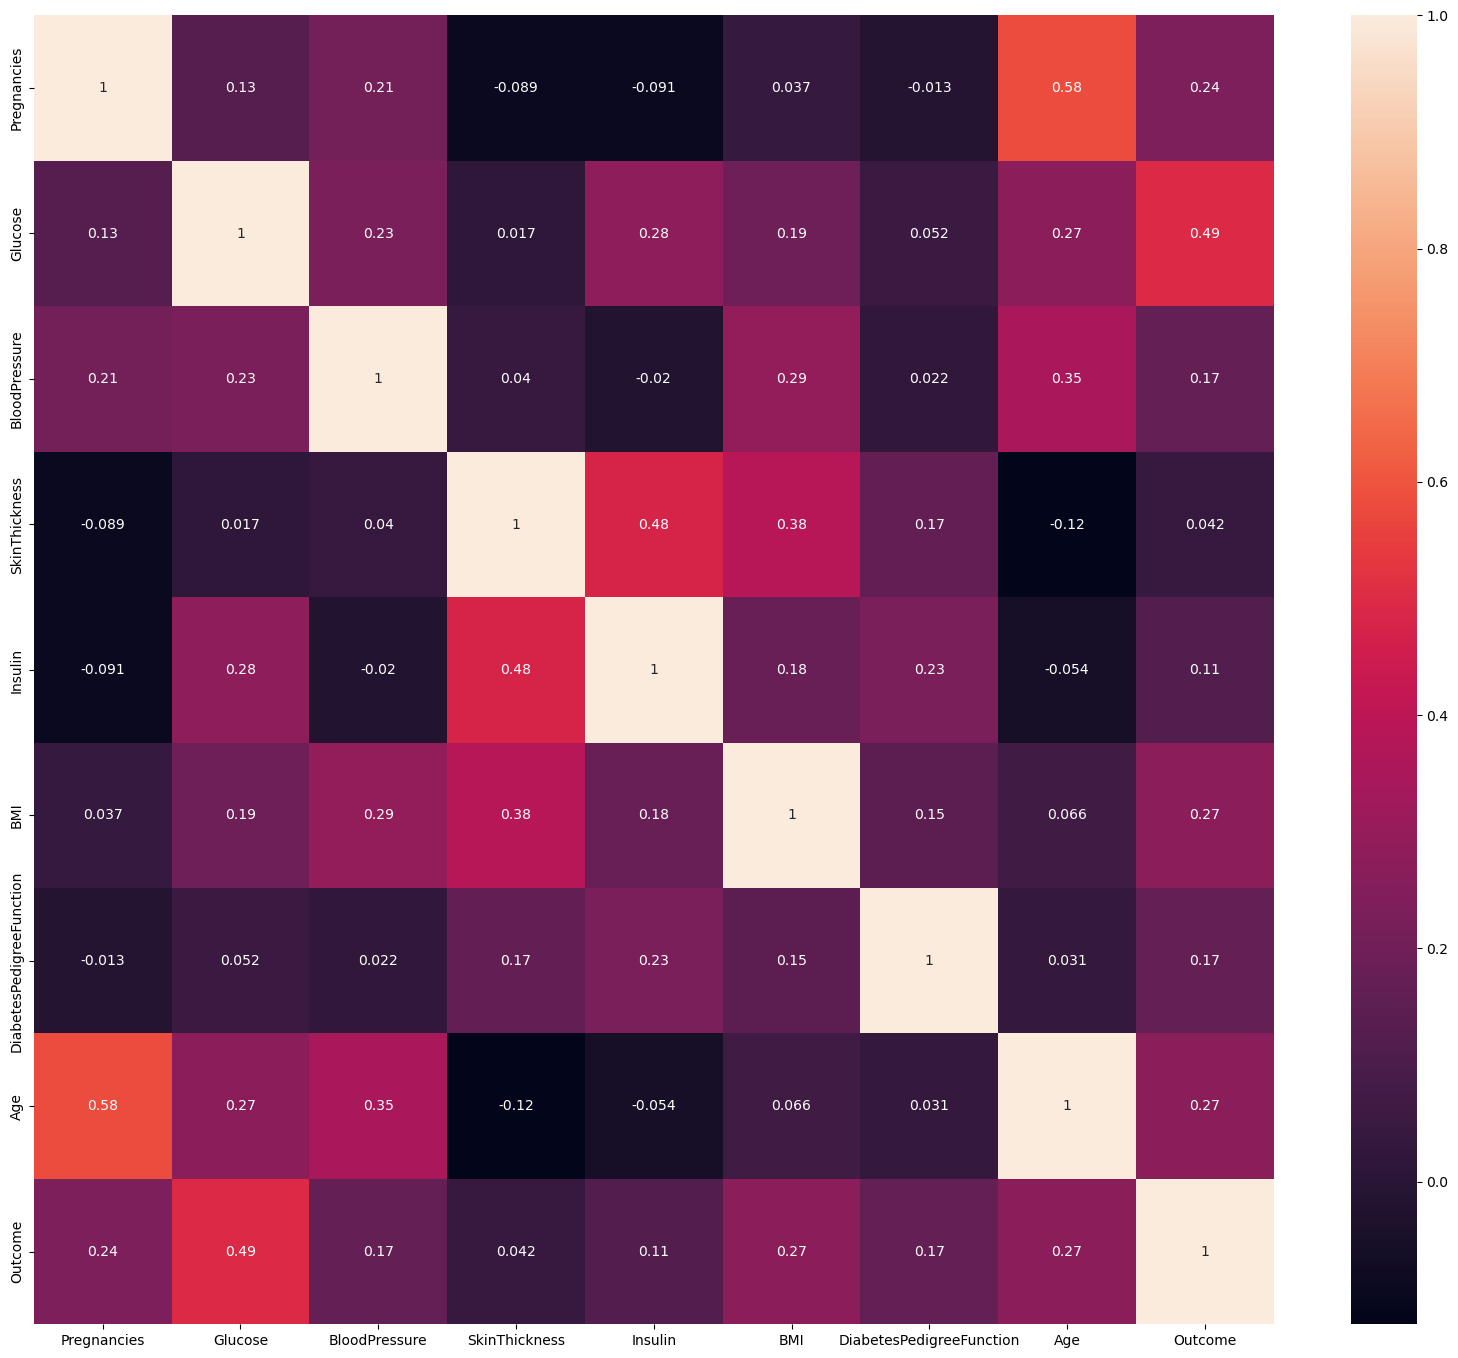

In [46]:
# corelation analysis to check multicollearity and feature elimination
plt.figure(figsize=(20,17))
sns.heatmap(health_data.corr(),annot=True)

In [47]:
# Skin thickness and insulin are least corelated to the Outcome , therefore we can eliminate those.

In [48]:
health_data.shape

(636, 9)

In [49]:
health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


### MODEL BUILDING

In [50]:
# feature set with elimination
features = health_data.iloc[:,[0,1,2,5,6,7]].values
label = health_data.iloc[:,[8]].values

# feature set without elimination
features1 = health_data.iloc[:,[0,1,2,3,4,5,6,7]].values

In [52]:
# Trying random forest with feature elimination
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

CL = 0.90
for rs in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train,y_train)

    testScore = model_rf.score(X_test,y_test)
    trainScore = model_rf.score(X_train,y_train)

    print("Test Score is {} and Train Score is {} in RS value {}".format(testScore,trainScore,rs))

Test Score is 0.765625 and Train Score is 1.0 in RS value 0
Test Score is 0.7734375 and Train Score is 1.0 in RS value 1
Test Score is 0.796875 and Train Score is 1.0 in RS value 2
Test Score is 0.7890625 and Train Score is 1.0 in RS value 3
Test Score is 0.765625 and Train Score is 1.0 in RS value 4
Test Score is 0.7890625 and Train Score is 1.0 in RS value 5
Test Score is 0.8125 and Train Score is 1.0 in RS value 6
Test Score is 0.78125 and Train Score is 1.0 in RS value 7
Test Score is 0.7890625 and Train Score is 1.0 in RS value 8
Test Score is 0.8046875 and Train Score is 1.0 in RS value 9


In [53]:
# Trying random forest without feature elimination

from sklearn.ensemble import RandomForestClassifier

CL = 0.90
for rs in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(features1,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train,y_train)

    testScore = model_rf.score(X_test,y_test)
    trainScore = model_rf.score(X_train,y_train)

    print("Test Score is {} and Train Score is {} in RS value {}".format(testScore,trainScore,rs))

Test Score is 0.7734375 and Train Score is 1.0 in RS value 0
Test Score is 0.7890625 and Train Score is 1.0 in RS value 1
Test Score is 0.7890625 and Train Score is 1.0 in RS value 2
Test Score is 0.796875 and Train Score is 1.0 in RS value 3
Test Score is 0.7578125 and Train Score is 1.0 in RS value 4
Test Score is 0.75 and Train Score is 1.0 in RS value 5
Test Score is 0.8046875 and Train Score is 1.0 in RS value 6
Test Score is 0.7890625 and Train Score is 1.0 in RS value 7
Test Score is 0.7890625 and Train Score is 1.0 in RS value 8
Test Score is 0.828125 and Train Score is 1.0 in RS value 9


In [54]:
# trying decision tree with feature elimination

from sklearn.tree import DecisionTreeClassifier

for rs in range(0,10):

    X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)

   
    model = DecisionTreeClassifier(max_depth=3,criterion="entropy")
    model.fit(X_train,y_train)

    testScore=model.score(X_test,y_test)
    trainScore = model.score(X_train,y_train)

        
    print("Test Score {} trainScore {}".format(testScore,trainScore))

Test Score 0.7578125 trainScore 0.797244094488189
Test Score 0.78125 trainScore 0.7755905511811023
Test Score 0.78125 trainScore 0.7913385826771654
Test Score 0.7578125 trainScore 0.7834645669291339
Test Score 0.7421875 trainScore 0.7854330708661418
Test Score 0.78125 trainScore 0.7775590551181102
Test Score 0.75 trainScore 0.7854330708661418
Test Score 0.765625 trainScore 0.781496062992126
Test Score 0.7421875 trainScore 0.7795275590551181
Test Score 0.828125 trainScore 0.7716535433070866


In [55]:
# trying Decision classifier without feature elimination
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

for rs in range(0,10):

    X_train,X_test,y_train,y_test = train_test_split(features1,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)

   
    model = DecisionTreeClassifier(max_depth=3,criterion="entropy")
    model.fit(X_train,y_train)

    testScore=model.score(X_test,y_test)
    trainScore = model.score(X_train,y_train)

        
    print("Test Score {} trainScore {}".format(testScore,trainScore))

Test Score 0.7578125 trainScore 0.797244094488189
Test Score 0.7890625 trainScore 0.7755905511811023
Test Score 0.78125 trainScore 0.7913385826771654
Test Score 0.7578125 trainScore 0.7834645669291339
Test Score 0.734375 trainScore 0.7893700787401575
Test Score 0.78125 trainScore 0.7775590551181102
Test Score 0.75 trainScore 0.7854330708661418
Test Score 0.765625 trainScore 0.781496062992126
Test Score 0.7578125 trainScore 0.7795275590551181
Test Score 0.828125 trainScore 0.7716535433070866


In [56]:
# Trying KNN with feature elimination
from sklearn.neighbors import KNeighborsClassifier

CL = 0.9
for i in range(0,10):
  X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=i)

  model = KNeighborsClassifier(n_neighbors=3)
  model.fit(X_train,y_train)

  testScore=model.score(X_test,y_test)
  trainScore = model.score(X_train,y_train)

  
  print("Test Score {} trainScore {} rs {}".format(testScore,trainScore,i))

Test Score 0.734375 trainScore 0.8740157480314961 rs 0
Test Score 0.7578125 trainScore 0.8562992125984252 rs 1
Test Score 0.7578125 trainScore 0.8661417322834646 rs 2
Test Score 0.765625 trainScore 0.8681102362204725 rs 3
Test Score 0.7734375 trainScore 0.8700787401574803 rs 4
Test Score 0.765625 trainScore 0.8759842519685039 rs 5
Test Score 0.765625 trainScore 0.8503937007874016 rs 6
Test Score 0.7421875 trainScore 0.8562992125984252 rs 7
Test Score 0.75 trainScore 0.8661417322834646 rs 8
Test Score 0.7734375 trainScore 0.8641732283464567 rs 9


In [60]:
# Trying KNN without feature elimination
from sklearn.neighbors import KNeighborsClassifier

CL = 0.9
for i in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(features1,
                                                     label,
                                                     test_size=0.2,
                                                     random_state=i)
    for n in range(1,20):

      model_KNN = KNeighborsClassifier(n_neighbors=n)
      model_KNN.fit(X_train,y_train)

      testScore = model_KNN.score(X_test,y_test)
      trainScore = model_KNN.score(X_train,y_train)

      if testScore > trainScore :
          print("Test Score {} trainScore {} rs {} for neighbors {}".format(testScore,trainScore,i,n))

Test Score 0.7890625 trainScore 0.7874015748031497 rs 1 for neighbors 8
Test Score 0.8046875 trainScore 0.7874015748031497 rs 1 for neighbors 9
Test Score 0.8125 trainScore 0.7716535433070866 rs 1 for neighbors 10
Test Score 0.8203125 trainScore 0.7775590551181102 rs 1 for neighbors 11
Test Score 0.7890625 trainScore 0.7775590551181102 rs 1 for neighbors 12
Test Score 0.796875 trainScore 0.7874015748031497 rs 1 for neighbors 13
Test Score 0.7890625 trainScore 0.7874015748031497 rs 1 for neighbors 15
Test Score 0.7890625 trainScore 0.7874015748031497 rs 2 for neighbors 15
Test Score 0.796875 trainScore 0.7913385826771654 rs 2 for neighbors 16
Test Score 0.796875 trainScore 0.7874015748031497 rs 2 for neighbors 18
Test Score 0.8046875 trainScore 0.797244094488189 rs 5 for neighbors 19
Test Score 0.796875 trainScore 0.7775590551181102 rs 6 for neighbors 10
Test Score 0.8046875 trainScore 0.7893700787401575 rs 6 for neighbors 12
Test Score 0.8046875 trainScore 0.7874015748031497 rs 6 for n

In [ ]:
### Therefore we get the best model with test score 81.25 and train score of 80.7 with n_neighbors 6 and at random state 9

In [61]:
X_train,X_test,y_train,y_test = train_test_split(features1,
                                                     label,
                                                     test_size=0.2,
                                                     random_state=9)

In [63]:
model_KNN = KNeighborsClassifier(n_neighbors=6)
model_KNN.fit(X_train,y_train)

testScore = model_KNN.score(X_test,y_test)
trainScore = model_KNN.score(X_train,y_train)
print (testScore)
print(trainScore)

0.8125
0.8070866141732284


In [64]:
# Trying with cross-validation with feature elimination
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_KNN, features, label, cv=10)
scores.mean()

0.7831597222222222

In [65]:
# Trying with cross-validation without feature elimination
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_KNN, features1, label, cv=10)
scores.mean()

0.7548859126984127

In [66]:
#### Classification report 
y_pred_knn = model_KNN.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        95
           1       0.80      0.36      0.50        33

    accuracy                           0.81       128
   macro avg       0.81      0.67      0.69       128
weighted avg       0.81      0.81      0.79       128



In [67]:
# Saving the model as a pickle file for further prediction.

In [68]:
import pickle

with open("model.pkl","wb") as f:
    pickle.dump(model_KNN,f)

In [69]:
# Saving the final dataframe.

In [73]:
pickle.dump(health_data,open('health_data.pkl','wb'))